In [0]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/drive/My Drive/histori_test.csv')

In [0]:
df

,id_user,id_trajet,rating
0,1,295,2
1,1,1379,2
2,1,8307,2
3,1,9201,4
4,1,1318,3
...,...,...,...
439995,2200,6221,2
439996,2200,8446,2
439997,2200,2299,3
439998,2200,10479,4


In [0]:
df.groupby('id_user')['id_trajet'].count().reset_index().sort_values('id_trajet', ascending=False)[:10]

,id_user,id_trajet
0,1,200
1469,1470,200
1463,1464,200
1464,1465,200
1465,1466,200
1466,1467,200
1467,1468,200
1468,1469,200
1470,1471,200
1444,1445,200


In [0]:
df.drop(['rating'],axis=1,inplace=True)

In [0]:
df.head()

,id_user,id_trajet
0,1,295
1,1,1379
2,1,8307
3,1,9201
4,1,1318


In [0]:
import random
from random import randint
df['rating']=''
for index,row in df.iterrows():
  df['rating'].iloc[index]=randint(1,5)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
df

,id_user,id_trajet,rating
0,1,295,2
1,1,1379,4
2,1,8307,2
3,1,9201,2
4,1,1318,4
...,...,...,...
439995,2200,6221,1
439996,2200,8446,2
439997,2200,2299,2
439998,2200,10479,1


In [0]:
count = df['rating'].value_counts()
print(count)

3    88333
2    88171
5    87875
1    87863
4    87758
Name: rating, dtype: int64


In [0]:
df.to_csv('/content/drive/My Drive/historiquerating_test.csv',header=["id_user","id_trajet",'rating'],index= False)

In [0]:
df1=pd.read_excel('/content/trajettest.xlsx')

In [0]:
df1.head(2)

,id_trajet,Ville de depart,Latitude,Longitude,Ville d'arrivée,Latitude.1,Longitude.1,Distance,prix,Year_dep,Month_dep,day_dep,weekday_name_dep,Hour_dep,minute_dep,day_arr,weekday_name_arr,Hour_arr,minute_arr,hour_duree,minute_duree,nombre_place,Moyen_de_transport,traffic,route,securite,accident,comfort,rating
0,0,RABAT,34.022405,-6.834543,CASABLANCA,33.595063,-7.618777,92.718000,18.5436,2018,7,31,Tuesday,21,31,31,Tuesday,22,38,1,7,4,Voiture,1,national,1,0,1,3
1,1,CASABLANCA,33.595063,-7.618777,TAZA,34.230155,-4.010104,403.209999,80.6420,2018,4,29,Sunday,11,12,29,Sunday,15,2,3,50,2,Voiture,2,national,1,1,0,1


In [0]:
df1.drop(['id_trajet','Year_dep','Month_dep','traffic','securite','comfort','rating'],axis=1,inplace=True)

In [0]:
df1['id_trajet']=pd.Series(range(1,10634))

In [0]:
df1.head()

,Ville de depart,Latitude,Longitude,Ville d'arrivée,Latitude.1,Longitude.1,Distance,prix,day_dep,weekday_name_dep,Hour_dep,minute_dep,day_arr,weekday_name_arr,Hour_arr,minute_arr,hour_duree,minute_duree,nombre_place,Moyen_de_transport,route,accident,id_trajet
0,RABAT,34.022405,-6.834543,CASABLANCA,33.595063,-7.618777,92.718000,18.5436,31,Tuesday,21,31,31,Tuesday,22,38,1,7,4,Voiture,national,0,1
1,CASABLANCA,33.595063,-7.618777,TAZA,34.230155,-4.010104,403.209999,80.6420,29,Sunday,11,12,29,Sunday,15,2,3,50,2,Voiture,national,1,2
2,KHENIFRA,32.935772,-5.669650,AGADIR,30.422037,-9.559509,649.335999,194.8008,15,Sunday,6,24,16,Monday,1,53,19,29,35,autocar,autoroute,0,3
3,RABAT,34.022405,-6.834543,TETOUAN,35.570175,-5.374278,270.819000,81.2457,5,Wednesday,6,0,5,Wednesday,15,33,9,33,20,autocar,autoroute,0,4
4,OUARZAZATE,30.920193,-6.910923,TEMARA,33.917166,-6.923804,509.914999,142.7762,23,Wednesday,15,30,23,Wednesday,21,9,5,39,4,Voiture,autoroute,0,5


In [0]:
ratings_ds = pd.merge(df, df1, on='id_trajet', how='inner')

In [0]:
ratings_ds

,id_user,id_trajet,rating,Ville de depart,Latitude,Longitude,Ville d'arrivée,Latitude.1,Longitude.1,Distance,prix,day_dep,weekday_name_dep,Hour_dep,minute_dep,day_arr,weekday_name_arr,Hour_arr,minute_arr,hour_duree,minute_duree,nombre_place,Moyen_de_transport,route,accident
0,1,295,2,TAZA,34.230155,-4.010104,AGADIR,30.422038,-9.559509,861.717001,258.5151,25,Saturday,12,59,25,Saturday,20,51,7,52,1,Voiture,national,0
1,5,295,3,TAZA,34.230155,-4.010104,AGADIR,30.422038,-9.559509,861.717001,258.5151,25,Saturday,12,59,25,Saturday,20,51,7,52,1,Voiture,national,0
2,22,295,1,TAZA,34.230155,-4.010104,AGADIR,30.422038,-9.559509,861.717001,258.5151,25,Saturday,12,59,25,Saturday,20,51,7,52,1,Voiture,national,0
3,80,295,1,TAZA,34.230155,-4.010104,AGADIR,30.422038,-9.559509,861.717001,258.5151,25,Saturday,12,59,25,Saturday,20,51,7,52,1,Voiture,national,0
4,93,295,3,TAZA,34.230155,-4.010104,AGADIR,30.422038,-9.559509,861.717001,258.5151,25,Saturday,12,59,25,Saturday,20,51,7,52,1,Voiture,national,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439995,1926,2905,5,CASABLANCA,33.595063,-7.618777,TETOUAN,35.570175,-5.374278,367.526000,73.5052,27,Saturday,10,13,27,Saturday,14,12,3,59,3,Voiture,autoroute,1
439996,1928,2905,3,CASABLANCA,33.595063,-7.618777,TETOUAN,35.570175,-5.374278,367.526000,73.5052,27,Saturday,10,13,27,Saturday,14,12,3,59,3,Voiture,autoroute,1
439997,1962,2905,3,CASABLANCA,33.595063,-7.618777,TETOUAN,35.570175,-5.374278,367.526000,73.5052,27,Saturday,10,13,27,Saturday,14,12,3,59,3,Voiture,autoroute,1
439998,1987,2905,1,CASABLANCA,33.595063,-7.618777,TETOUAN,35.570175,-5.374278,367.526000,73.5052,27,Saturday,10,13,27,Saturday,14,12,3,59,3,Voiture,autoroute,1


In [0]:
pip install surprise

     |████████████████████████████████| 6.5MB 2.7MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1673653 sha256=4637f939f4845c31040eeccc16c94a88d075d83537c44dee6a533426edee9dae
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [0]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore
from surprise import SVD, SVDpp, NMF
from surprise import SlopeOne, CoClustering

In [0]:
ratings_ds.describe()

,id_user,id_trajet,rating,Latitude,Longitude,Latitude.1,Longitude.1,Distance,prix,day_dep,Hour_dep,minute_dep,day_arr,Hour_arr,minute_arr,hour_duree,minute_duree,nombre_place,accident
count,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000
mean,1100.500000,5315.926477,3.002850,35.032658,-3.969123,33.846290,-5.670149,364.864129,110.479437,15.656143,14.527143,29.713880,15.647186,12.738007,29.556627,5.275516,29.275611,7.699489,0.115100
std,635.085952,3068.637002,1.414442,7.627608,11.649670,2.132715,3.194968,232.944932,80.307283,8.777932,5.150314,17.323645,8.770779,7.118658,17.249430,4.672576,17.261363,8.874052,0.319143
min,1.000000,1.000000,1.000000,30.356293,-9.762090,30.356293,-9.762090,9.978000,1.995600,1.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,550.750000,2651.000000,2.000000,32.334193,-7.581147,32.885508,-7.581147,174.597000,48.636400,8.000000,10.000000,15.000000,8.000000,7.000000,15.000000,2.000000,14.000000,2.000000,0.000000
50%,1100.500000,5317.000000,3.000000,33.917166,-6.570169,33.894009,-6.353335,327.282001,93.482700,16.000000,15.000000,30.000000,16.000000,14.000000,30.000000,4.000000,30.000000,3.000000,0.000000
75%,1650.250000,7967.000000,4.000000,34.796757,-4.434081,34.677874,-4.833336,513.295999,154.413900,23.000000,19.000000,45.000000,23.000000,19.000000,45.000000,7.000000,44.000000,11.000000,0.000000
max,2200.000000,10633.000000,5.000000,100.323222,97.343948,42.651545,6.925006,1072.058001,482.426100,31.000000,23.000000,59.000000,31.000000,23.000000,59.000000,23.000000,59.000000,35.000000,1.000000


In [0]:
print('No. of Unique Users    :', ratings_ds.id_user.nunique())
print('No. of Unique trajet :', ratings_ds.id_trajet.nunique())
print('No. of Unique Ratings  :', ratings_ds.rating.nunique())

No. of Unique Users    : 2200
No. of Unique trajet : 10633
No. of Unique Ratings  : 5


In [0]:
rts_gp = ratings_ds.groupby(by=['rating']).agg({'id_user': 'count'}).reset_index()
rts_gp.columns = ['Rating', 'Count']

In [0]:
rts_gp

,Rating,Count
0,1,87812
1,2,87732
2,3,88194
3,4,87914
4,5,88348


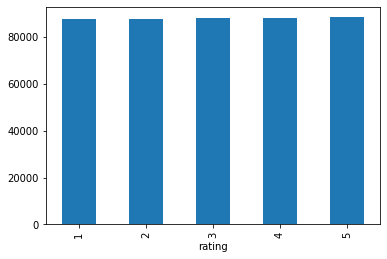

In [0]:
ratings_ds.groupby('rating').count()['id_user'].plot.bar()

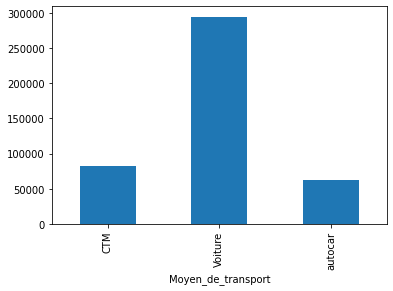

In [0]:
ratings_ds.groupby('Moyen_de_transport').count()['id_user'].plot.bar()

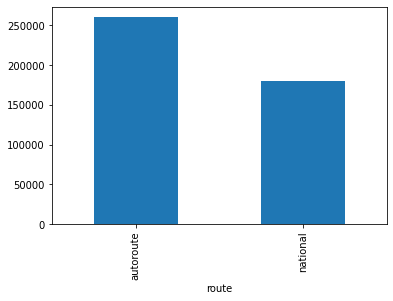

In [0]:
ratings_ds.groupby('route').count()['id_user'].plot.bar()

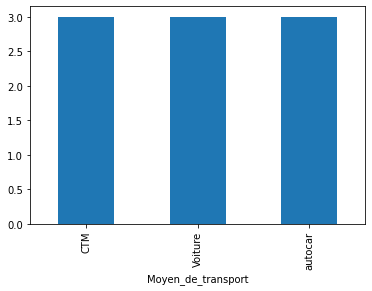

In [0]:
ratings_ds.groupby('Moyen_de_transport').mean()['rating'].plot.bar()

In [0]:
# Set Rating Scale
reader = Reader(rating_scale=(1, 5))

# Load data with rating scale
data = Dataset.load_from_df(ratings_ds[['id_user', 'id_trajet', 'rating']], reader)

In [0]:
knnbasic_cv = cross_validate(KNNBasic(), data, cv=5, n_jobs=5, verbose=False)
knnmeans_cv = cross_validate(KNNWithMeans(), data, cv=5, n_jobs=5, verbose=False)
knnz_cv = cross_validate(KNNWithZScore(), data, cv=5, n_jobs=5, verbose=False)

In [0]:
svd_cv = cross_validate(SVD(), data, cv=5, n_jobs=5, verbose=False)

In [0]:
slope_cv = cross_validate(SlopeOne(), data, cv=5, n_jobs=5, verbose=False)

In [0]:
print('Algorithm\t RMSE\t\t MAE')
print()
print('KNN Basic', '\t', round(knnbasic_cv['test_rmse'].mean(), 4), '\t', round(knnbasic_cv['test_mae'].mean(), 4))
print('KNN Means', '\t', round(knnmeans_cv['test_rmse'].mean(), 4), '\t', round(knnmeans_cv['test_mae'].mean(), 4))
print('KNN ZScore', '\t', round(knnz_cv['test_rmse'].mean(), 4), '\t', round(knnz_cv['test_mae'].mean(), 4))
print()
print('SVD', '\t\t', round(svd_cv['test_rmse'].mean(), 4), '\t', round(svd_cv['test_mae'].mean(), 4))
print()
print('SlopeOne', '\t', round(slope_cv['test_rmse'].mean(), 4), '\t', round(slope_cv['test_mae'].mean(), 4))
print()

Algorithm	 RMSE		 MAE

KNN Basic 	 1.4516 	 1.2521
KNN Means 	 1.456 	 1.2553
KNN ZScore 	 1.4549 	 1.2542

SVD 		 1.4734 	 1.2662

SlopeOne 	 1.4594 	 1.2573



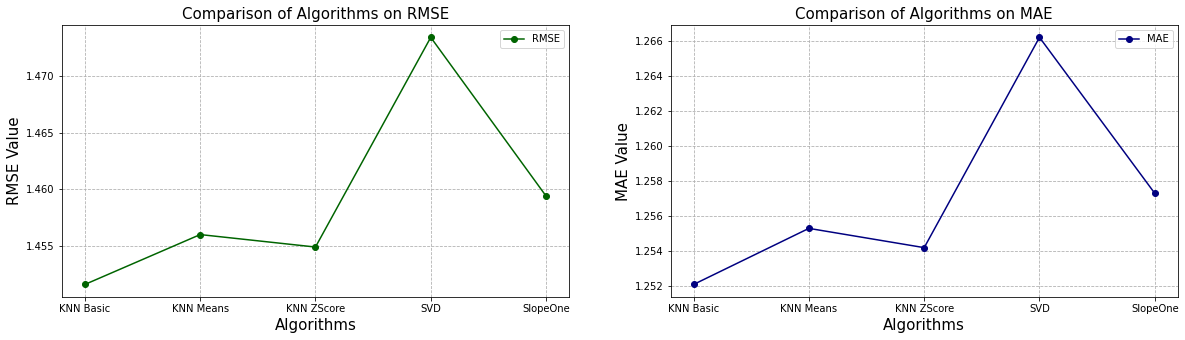

In [0]:
x_algo = ['KNN Basic', 'KNN Means', 'KNN ZScore', 'SVD',  'SlopeOne']
all_algos_cv = [knnbasic_cv, knnmeans_cv, knnz_cv, svd_cv, slope_cv]

rmse_cv = [round(res['test_rmse'].mean(), 4) for res in all_algos_cv]
mae_cv = [round(res['test_mae'].mean(), 4) for res in all_algos_cv]

plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.title('Comparison of Algorithms on RMSE', loc='center', fontsize=15)
plt.plot(x_algo, rmse_cv, label='RMSE', color='darkgreen', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.subplot(1, 2, 2)
plt.title('Comparison of Algorithms on MAE', loc='center', fontsize=15)
plt.plot(x_algo, mae_cv, label='MAE', color='navy', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('MAE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.show()

In [0]:
param_grid = {'k': [15, 20, 25, 30, 40, 50, 60]}

knnbasic_gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)
knnbasic_gs.fit(data)

knnmeans_gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)
knnmeans_gs.fit(data)

knnz_gs = GridSearchCV(KNNWithZScore, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)
knnz_gs.fit(data)

In [0]:
x = [15, 20, 25, 30, 40, 50, 60]
y1 = knnbasic_gs.cv_results['mean_test_rmse']
y2 = knnbasic_gs.cv_results['mean_test_mae']

y3 = knnmeans_gs.cv_results['mean_test_rmse']
y4 = knnmeans_gs.cv_results['mean_test_mae']

y5 = knnz_gs.cv_results['mean_test_rmse']
y6 = knnz_gs.cv_results['mean_test_mae']

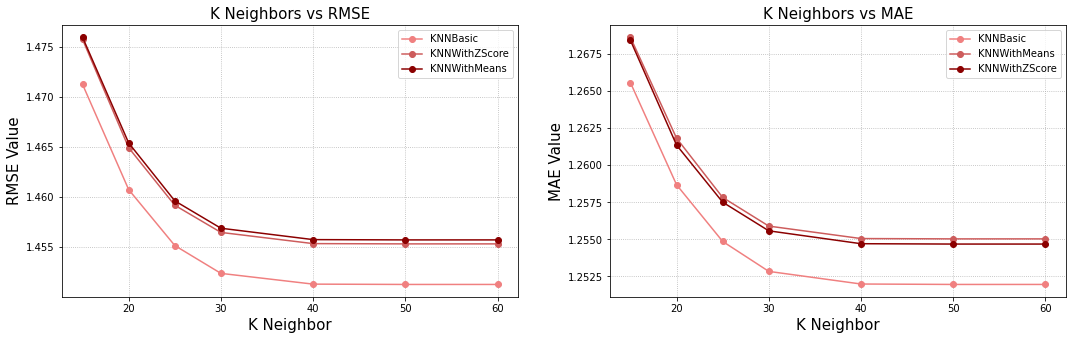

In [0]:
plt.figure(figsize=(18,5))

plt.subplot(1, 2, 1)
plt.title('K Neighbors vs RMSE', loc='center', fontsize=15)
plt.plot(x, y1, label='KNNBasic', color='lightcoral', marker='o')
plt.plot(x, y5, label='KNNWithZScore', color='indianred', marker='o')
plt.plot(x, y3, label='KNNWithMeans', color='darkred', marker='o')
plt.xlabel('K Neighbor', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dotted')

plt.subplot(1, 2, 2)
plt.title('K Neighbors vs MAE', loc='center', fontsize=15)
plt.plot(x, y2, label='KNNBasic', color='lightcoral', marker='o')
plt.plot(x, y4, label='KNNWithMeans', color='indianred', marker='o')
plt.plot(x, y6, label='KNNWithZScore', color='darkred', marker='o')
plt.xlabel('K Neighbor', fontsize=15)
plt.ylabel('MAE Value', fontsize=15)
plt.legend()
plt.grid(ls='dotted')

plt.show()

In [0]:
print('RMSE =', knnbasic_gs.best_params['rmse'])
print('MAE =', knnbasic_gs.best_params['mae'])

RMSE = {'k': 60}
MAE = {'k': 60}


In [0]:
print('RMSE =', knnmeans_gs.best_params['rmse'])
print('MAE =', knnmeans_gs.best_params['mae'])

RMSE = {'k': 60}
MAE = {'k': 60}


In [0]:
print('knnmeans - RMSE:', round( knnmeans_gs.best_score['rmse'], 4), '; MAE:', round( knnmeans_gs.best_score['mae'], 4))

knnmeans - RMSE: 1.4557 ; MAE: 1.255


In [0]:
# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(ratings_ds[['id_user', 'id_trajet', 'rating']], reader)
anti_set = data.build_full_trainset().build_anti_testset()

In [0]:
anti_set

[(1, 8227, 2.999115909090909),
 (1, 8269, 2.999115909090909),
 (1, 9884, 2.999115909090909),
 (1, 9634, 2.999115909090909),
 (1, 14, 2.999115909090909),
 (1, 10146, 2.999115909090909),
 (1, 8997, 2.999115909090909),
 (1, 910, 2.999115909090909),
 (1, 9768, 2.999115909090909),
 (1, 4023, 2.999115909090909),
 (1, 8027, 2.999115909090909),
 (1, 1412, 2.999115909090909),
 (1, 8781, 2.999115909090909),
 (1, 152, 2.999115909090909),
 (1, 2966, 2.999115909090909),
 (1, 5163, 2.999115909090909),
 (1, 886, 2.999115909090909),
 (1, 1530, 2.999115909090909),
 (1, 7559, 2.999115909090909),
 (1, 9325, 2.999115909090909),
 (1, 10581, 2.999115909090909),
 (1, 4555, 2.999115909090909),
 (1, 8553, 2.999115909090909),
 (1, 1946, 2.999115909090909),
 (1, 9066, 2.999115909090909),
 (1, 10560, 2.999115909090909),
 (1, 4625, 2.999115909090909),
 (1, 7266, 2.999115909090909),
 (1, 10522, 2.999115909090909),
 (1, 4114, 2.999115909090909),
 (1, 9402, 2.999115909090909),
 (1, 1101, 2.999115909090909),
 (1, 2212

In [0]:
from surprise.model_selection import KFold
from surprise import accuracy
kf = KFold(n_splits=40)
algo = KNNBasic()
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    if rmse < best_rmse:
        best_algo = algo
        best_pred = predictions

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.4430
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.4433
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.4428
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.4367
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.4388
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.4393
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.4431
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.4370
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.4421
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.4287
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.4429
Computing the msd similarity matrix...
Done computing 

In [0]:
pred_df = pd.DataFrame(best_pred).merge(ratings_ds , left_on = ['uid', 'iid'], right_on = ['id_user', 'id_trajet'])

In [0]:
pred_df[['uid', 'iid','id_user', 'id_trajet','Ville de depart',"Ville d'arrivée",'prix','Moyen_de_transport','route', 'est','rating']]

,uid,iid,id_user,id_trajet,Ville de depart,Ville d'arrivée,prix,Moyen_de_transport,route,est,rating
0,1751,2091,1751,2091,OUEZZANE,NADOR,133.03590,autocar,autoroute,3.109741,4
1,1400,1989,1400,1989,BERRECHID,FES,181.78560,CTM,autoroute,2.779861,1
2,2050,695,2050,695,ELJADIDA,KHOURIBGA,60.64230,Voiture,national,3.174220,1
3,1649,890,1649,890,FES,OUEZZANE,66.91650,Voiture,national,2.880658,4
4,1398,9000,1398,9000,TEMARA,ESSAOUIRA,202.27275,CTM,autoroute,2.967178,2
...,...,...,...,...,...,...,...,...,...,...,...
10995,1471,5327,1471,5327,FES,RABAT,124.28325,CTM,autoroute,2.652806,4
10996,293,2382,293,2382,KENITRA,CASABLANCA,28.91380,Voiture,autoroute,3.395206,5
10997,2110,8439,2110,8439,FES,TIFLET,66.72450,Voiture,national,3.323844,4
10998,1917,1954,1917,1954,AGADIR,KHEMISSET,287.96985,CTM,autoroute,3.288542,3


In [0]:
trajet= ratings_ds[['id_trajet','Ville de depart','Latitude','Longitude',"Ville d'arrivée","Latitude.1",'Longitude.1','Distance','prix','day_dep','weekday_name_dep','Hour_dep','minute_dep','day_arr','weekday_name_arr','Hour_arr','minute_arr','hour_duree','minute_duree','nombre_place','Moyen_de_transport','route','accident']]
trajet.drop_duplicates(['id_trajet','Ville de depart','Latitude','Longitude',"Ville d'arrivée","Latitude.1",'Longitude.1','Distance','prix','day_dep','weekday_name_dep','Hour_dep','minute_dep','day_arr','weekday_name_arr','Hour_arr','minute_arr','hour_duree','minute_duree','nombre_place','Moyen_de_transport','route','accident'])

,id_trajet,Ville de depart,Latitude,Longitude,Ville d'arrivée,Latitude.1,Longitude.1,Distance,prix,day_dep,weekday_name_dep,Hour_dep,minute_dep,day_arr,weekday_name_arr,Hour_arr,minute_arr,hour_duree,minute_duree,nombre_place,Moyen_de_transport,route,accident
0,295,TAZA,34.230155,-4.010104,AGADIR,30.422038,-9.559509,861.717001,258.51510,25,Saturday,12,59,25,Saturday,20,51,7,52,1,Voiture,national,0
42,1379,SIDI KACEM,34.226412,-5.711434,AGADIR,30.422038,-9.559509,685.911000,171.47775,30,Sunday,11,13,30,Sunday,17,51,6,38,3,Voiture,national,0
77,8307,AL HOCEIMA,35.245114,-3.930186,TIFLET,33.894009,-6.316730,407.343001,122.20290,18,Tuesday,7,35,18,Tuesday,12,4,4,29,1,Voiture,national,0
108,9201,AGADIR,30.422037,-9.559509,RABAT,34.022405,-6.834543,549.542000,109.90840,12,Wednesday,22,29,13,Thursday,3,39,5,10,3,Voiture,autoroute,0
159,1318,MOHAMMADIA,33.695838,-7.389329,KENITRA,34.264570,-6.570169,117.306000,29.32650,4,Friday,11,28,4,Friday,12,42,1,14,4,Voiture,autoroute,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439826,776,AGADIR,30.422036,-9.559509,AL HOCEIMA,35.245114,-3.930186,1014.802001,202.96040,27,Tuesday,17,45,28,Wednesday,3,47,10,2,2,Voiture,national,0
439866,1536,MEKNES,42.651545,-1.309065,OUJDA,34.677874,-1.929306,383.986001,107.51608,14,Wednesday,22,38,15,Thursday,2,13,3,35,3,Voiture,national,0
439904,5057,KENITRA,34.264570,-6.570169,TETOUAN,35.570175,-5.374278,225.646000,56.41150,24,Monday,9,49,24,Monday,12,31,2,42,2,Voiture,national,0
439937,5220,TAZA,34.230155,-4.010104,AL HOCEIMA,35.245114,-3.930186,156.469000,31.29380,1,Thursday,10,31,1,Thursday,12,50,2,19,3,Voiture,autoroute,0


In [0]:
users = ratings_ds[['id_user']].drop_duplicates(['id_user'])




In [0]:
pred_df[(pred_df['est']>3.0)&(pred_df['id_user']==33)]

,uid,iid,r_ui,est,details,id_user,id_trajet,rating,Ville de depart,Latitude,Longitude,Ville d'arrivée,Latitude.1,Longitude.1,Distance,prix,day_dep,weekday_name_dep,Hour_dep,minute_dep,day_arr,weekday_name_arr,Hour_arr,minute_arr,hour_duree,minute_duree,nombre_place,Moyen_de_transport,route,accident
1841,33,7594,4.0,3.055569,"{'actual_k': 34, 'was_impossible': False}",33,7594,4,KENITRA,34.26457,-6.570169,RABAT,34.022405,-6.834543,46.898,11.7245,29,Saturday,21,0,29,Saturday,21,40,0,40,2,Voiture,national,1


In [0]:
pred_df[(pred_df['est']>3.0)&(pred_df['id_user']==3)].sort_values('rating', ascending=False)


,uid,iid,r_ui,est,details,id_user,id_trajet,rating,Ville de depart,Latitude,Longitude,Ville d'arrivée,Latitude.1,Longitude.1,Distance,prix,day_dep,weekday_name_dep,Hour_dep,minute_dep,day_arr,weekday_name_arr,Hour_arr,minute_arr,hour_duree,minute_duree,nombre_place,Moyen_de_transport,route,accident
3694,3,5568,5.0,3.135155,"{'actual_k': 37, 'was_impossible': False}",3,5568,5,BENI MELLAL,32.334193,-6.353335,KHENIFRA,32.935772,-5.669650,125.127000,56.30715,20,Wednesday,19,42,20,Wednesday,23,21,3,39,12,CTM,autoroute,0
2332,3,6856,2.0,3.224399,"{'actual_k': 40, 'was_impossible': False}",3,6856,2,CASABLANCA,33.595063,-7.618777,TAZA,34.230155,-4.010104,403.209999,120.96300,14,Friday,16,38,14,Friday,20,28,3,50,2,Voiture,national,1
5673,3,10136,2.0,3.222804,"{'actual_k': 37, 'was_impossible': False}",3,10136,2,NADOR,35.051918,-2.824399,OUARZAZATE,30.920193,-6.910923,810.825999,243.24780,25,Tuesday,11,43,26,Wednesday,18,43,7,0,33,autocar,autoroute,0
6265,3,894,2.0,3.502724,"{'actual_k': 38, 'was_impossible': False}",3,894,2,AL HOCEIMA,35.245114,-3.930186,OUEZZANE,34.796757,-5.578493,270.703000,54.14060,7,Monday,22,12,8,Tuesday,2,16,4,4,2,Voiture,autoroute,0
7800,3,9403,1.0,3.769114,"{'actual_k': 39, 'was_impossible': False}",3,9403,1,AL HOCEIMA,35.245114,-3.930186,OUJDA,34.677874,-1.929306,257.945000,51.58900,21,Thursday,13,15,21,Thursday,16,41,3,26,3,Voiture,national,0


In [0]:
pred_df(['rating'])

In [0]:
pred_df[(pred_df['est']>3.0)&(pred_df['id_user']==1)].sort_values('rating', ascending=False)

,uid,iid,r_ui,est,details,id_user,id_trajet,rating,Ville de depart,Latitude,Longitude,Ville d'arrivée,Latitude.1,Longitude.1,Distance,prix,day_dep,weekday_name_dep,Hour_dep,minute_dep,day_arr,weekday_name_arr,Hour_arr,minute_arr,hour_duree,minute_duree,nombre_place,Moyen_de_transport,route,accident
3800,1,7488,2.0,3.215854,"{'actual_k': 40, 'was_impossible': False}",1,7488,2,FES,34.034653,-5.016193,BERRECHID,33.267675,-7.581147,406.054000,101.5135,16,Monday,10,43,16,Monday,14,39,3,56,4,Voiture,autoroute,0
10534,1,4226,2.0,3.462909,"{'actual_k': 40, 'was_impossible': False}",1,4226,2,CASABLANCA,33.595063,-7.618777,MOHAMMADIA,33.695838,-7.389329,30.024001,7.5060,3,Monday,11,31,3,Monday,12,1,0,30,2,Voiture,national,0


In [0]:
pred_df[(pred_df['est']>3.0)&(pred_df['id_user']==100)].sort_values('rating', ascending=False)

,uid,iid,r_ui,est,details,id_user,id_trajet,rating,Ville de depart,Latitude,Longitude,Ville d'arrivée,Latitude.1,Longitude.1,Distance,prix,day_dep,weekday_name_dep,Hour_dep,minute_dep,day_arr,weekday_name_arr,Hour_arr,minute_arr,hour_duree,minute_duree,nombre_place,Moyen_de_transport,route,accident
859,100,7245,4.0,3.048518,"{'actual_k': 40, 'was_impossible': False}",100,7245,4,MOHAMMADIA,33.695838,-7.389329,SAFI,32.249414,-8.994165,268.915,121.01175,25,Monday,11,27,25,Monday,16,28,5,1,6,CTM,autoroute,0
